<a href="https://colab.research.google.com/github/Aman78695/Stress_Level_Detection/blob/main/Stress_Level_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd .read_csv('/content/stress.csv')

In [3]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [4]:
df=df[['text','label']]

In [5]:
df.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2838 non-null   object
 1   label   2838 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.5+ KB


In [7]:
df['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

In [8]:
df.isnull().sum()

text     0
label    0
dtype: int64

#Mapping 1 to stress and 0 to not_stress

In [9]:
df['stress_or_not']=df['label'].map({0:'not_stress',1:'stress'})

In [10]:
df.head()

,text,label,stress_or_not
0,"He said he had not felt that way before, sugge...",1,stress
1,"Hey there r/assistance, Not sure if this is th...",0,not_stress
2,My mom then hit me with the newspaper and it s...,1,stress
3,"until i met my new boyfriend, he is amazing, h...",1,stress
4,October is Domestic Violence Awareness Month a...,1,stress


#making seperate dataframe of not_stress and stress and creating the wordcloud

In [19]:
X_not_stress=df[df['stress_or_not']=='not_stress']

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [23]:
text3=' '.join(X_not_stress['text'])

In [25]:
len(text3)

588735

In [26]:
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text3)


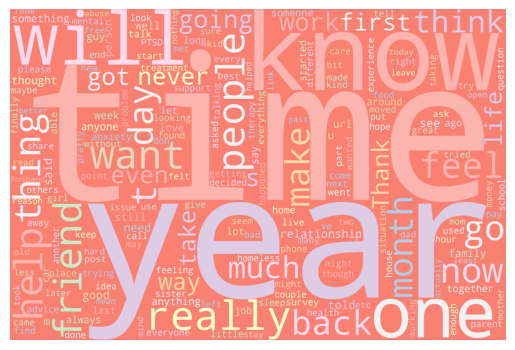

In [28]:
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [29]:
X_stress=df[df['stress_or_not']=='stress']

In [30]:
text4=' '.join(X_not_stress['text'])

In [31]:
word_cloud_2 = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text4)

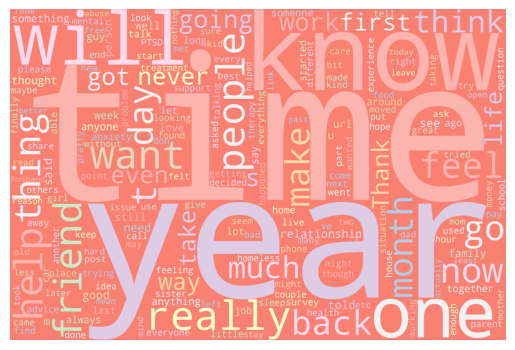

In [32]:
plt.imshow(word_cloud_2)
plt.axis("off")
plt.show()

#text preprocessing

In [35]:
import nltk
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
from nltk.tokenize import word_tokenize

In [ ]:
tokenizer=word_tokenize

In [37]:
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [47]:
lemmatizer=WordNetLemmatizer()

In [44]:
type(df['text'].head()[0])

str

In [39]:
df['text']=df['text'].apply(lambda x:x.lower())

In [45]:
df['text']=df['text'].apply(lambda x:[i for i in x.split() if i not in stop_words])

In [46]:
df['text'].head()

0    [said, felt, way, before,, suggeted, go, rest,...
1    [hey, r/assistance,, sure, right, place, post,...
2    [mom, hit, newspaper, shocked, would, this,, k...
3    [met, new, boyfriend,, amazing,, kind,, sweet,...
4    [october, domestic, violence, awareness, month...
Name: text, dtype: object

In [51]:
df['text']=df['text'].apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

In [52]:
df['text'].head()

0    [said, felt, way, before,, suggeted, go, rest,...
1    [hey, r/assistance,, sure, right, place, post,...
2    [mom, hit, newspaper, shocked, would, this,, k...
3    [met, new, boyfriend,, amazing,, kind,, sweet,...
4    [october, domestic, violence, awareness, month...
Name: text, dtype: object

In [53]:
df['text']=df['text'].apply(lambda x:' '.join(x))

In [54]:
df['text'].head()

0    said felt way before, suggeted go rest ..trigg...
1    hey r/assistance, sure right place post this.....
2    mom hit newspaper shocked would this, know lik...
3    met new boyfriend, amazing, kind, sweet, good ...
4    october domestic violence awareness month dome...
Name: text, dtype: object

#converting text to vectors

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [67]:
df.head()

,text,label,stress_or_not
0,"said felt way before, suggeted go rest ..trigg...",1,stress
1,"hey r/assistance, sure right place post this.....",0,not_stress
2,"mom hit newspaper shocked would this, know lik...",1,stress
3,"met new boyfriend, amazing, kind, sweet, good ...",1,stress
4,october domestic violence awareness month dome...,1,stress


In [68]:
cv=CountVectorizer()
X=cv.fit_transform(df['text'])

In [69]:
X

<2838x10976 sparse matrix of type '<class 'numpy.int64'>'
	with 105913 stored elements in Compressed Sparse Row format>

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [73]:
from sklearn.naive_bayes import BernoulliNB

In [74]:
model=BernoulliNB()

In [75]:
model.fit(X_train,y_train)

BernoulliNB()

In [85]:
user=input('text')

texti am eating biryani enjoy


In [86]:
data=cv.transform([user]).toarray()

In [87]:
model.predict(data)

array([1])